# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from src.annotation.sam import load_sam_predictor, yolo_sam_segmentation, sam_segmentation
from src.annotation.yolo import load_yolov8_detector, draw_bounding_boxes, yolov8_detect


# Utils functions


In [2]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)


# YOLOv8 trained on custom bubbles dataset

In [3]:
custom_yolo_checkpoint_path = r""
detector = load_yolov8_detector(custom_yolo_checkpoint_path)

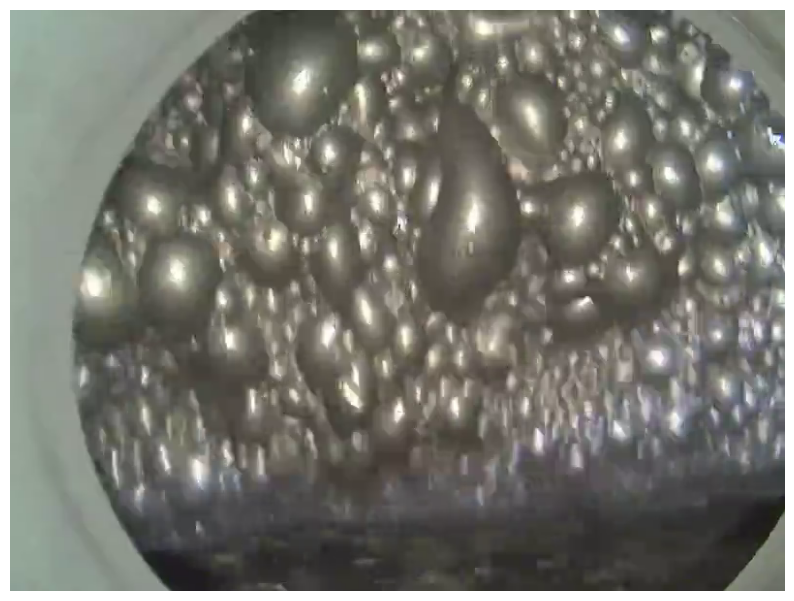

In [4]:
image = cv2.imread(r'')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [5]:
boxes = yolov8_detect(image=image, detector=detector, return_objects=False)

0: 608x800 66 bubbles, 294.3ms
Speed: 4.0ms preprocess, 294.3ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


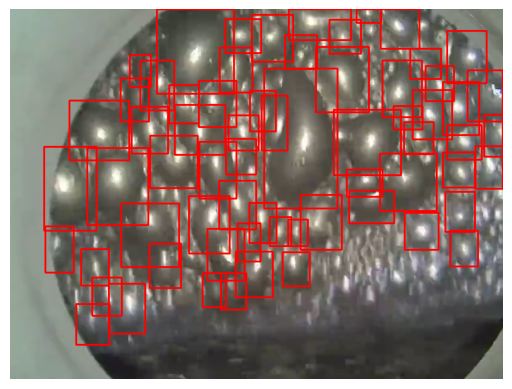

In [6]:
image_example = image.copy()

draw_bounding_boxes(image=image_example, boxes=boxes)

# SAM Checkpoint

In [9]:
sam_checkpoint = r""
model_type = "vit_h"
device="cuda"

predictor = load_sam_predictor(checkpoint_path=sam_checkpoint, model_type=model_type, device=device)

Predictor's device is cpu


# Segmentation by bounding box prompt

In [ ]:
mask_sam, mask_watershed, mask_final = yolo_sam_segmentation(image, detector, predictor)

Result:

In [ ]:
fig, ax = plt.subplots(
        nrows=1,
        ncols=4,
        figsize=(24, 6)
)

ax[0].imshow(image)
ax[0].set_title("original")

ax[1].imshow(mask_sam, cmap="gray")
ax[1].set_title("mask sam")

ax[2].imshow(mask_watershed, cmap="gray")
ax[2].set_title("mask watershed")

ax[3].imshow(mask_final, cmap="gray")
ax[3].set_title("mask final")

plt.axis('off')

# Segmentation by bounding box and point prompt


In [ ]:
masks_list = sam_segmentation(image=image, predictor=predictor, boxes=boxes, prompt_point=True)

plt.figure()
plt.imshow(image)

for i in range(len(masks_list)):
    masks = masks_list[i]
    show_mask(masks[0], plt.gca())

plt.axis('off')
plt.show()